# Bookmark Clustering

In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from time import time
import matplotlib.pyplot as plt 
%matplotlib inline

Test out K-means
LDA
Go back to Galvanize assignments and review topic modeling - NMF etc.

In [2]:
df = pd.read_pickle('Data/df_website_content.pkl')

In [3]:
df = df.drop_duplicates()

In [4]:
df = df[df['text'] != 'empty']

In [5]:
df = df.sample(frac=1)

In [6]:
df.reset_index(drop=True, inplace=True)

## K-Means

In [24]:
from sklearn.preprocessing import normalize
from sklearn.metrics import pairwise_distances 

Sklearn centers the data but doing normalization explicitly here 

In [9]:
tf_idf = TfidfVectorizer(stop_words='english', min_df=2, max_df=.95).fit_transform(df['text'])

In [10]:
tf_idf = normalize(tf_idf)

In [11]:
model_5 = KMeans(n_clusters=5, n_init=15, n_jobs=4)
m5_distances = model_5.fit_transform(tf_idf)

In [74]:
def build_models(num_clusters, n_iter, jobs=4):
    model_dict = {}
    model = KMeans(n_clusters=num_clusters, n_init=n_iter, n_jobs=jobs)
    model_dict['k'] = num_clusters
    model_dict['distances'] = model.fit_transform(tf_idf)
    model_dict['centers'] = model.cluster_centers_
    model_dict['labels'] = model.labels_
    return model_dict

In [95]:
k_lst = np.arange(5, 260, 40)
print k_lst

[  5  45  85 125 165 205 245]


In [85]:
models = {}
for k in k_lst:
    m_temp = build_models(k, 15, 4)
    models[k] = m_temp

In [87]:
test_d[5]['centers']

array([[  1.35312366e-02,   2.75134526e-03,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  1.58448073e-03,   1.72221403e-03,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  7.44977547e-03,   2.10116049e-03,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   5.39439403e-04],
       [  5.92121465e-03,   3.62972646e-03,   2.18747949e-04, ...,
          4.09525819e-04,   4.33989180e-04,   5.58841904e-05],
       [  4.80363829e-03,   4.51083077e-03,   3.39397603e-04, ...,
          5.27835701e-05,   2.34164804e-04,   7.37753299e-05]])

In [65]:
m_5, m_20, m_35, m_50, m_65, m_80 = [build_models(k, 15, 4) for k in k_lst]

In [20]:
def compute_heterogeneity(data, k, centroids, cluster_assignment):
    
    heterogeneity = 0.0
    for i in xrange(k):
        
        # Select all data points that belong to cluster i. Fill in the blank (RHS only)
        member_data_points = data[cluster_assignment==i, :]
        
        if member_data_points.shape[0] > 0: # check if i-th cluster is non-empty
            # Compute distances from centroid to data points (RHS only)
            distances = pairwise_distances(member_data_points, [centroids[i]], metric='euclidean')
            squared_distances = distances**2
            heterogeneity += np.sum(squared_distances)
        
    return heterogeneity

In [66]:
model_lst = [m_5, m_20, m_35, m_50, m_65, m_80]

In [80]:
h_lst = [compute_heterogeneity(tf_idf, model['k'], model['centers'], model['labels']) for model in model_lst]

In [81]:
def plot_k_vs_heterogeneity(k_values, heterogeneity_values):
    plt.figure(figsize=(7,4))
    plt.plot(k_values, heterogeneity_values, linewidth=4)
    plt.xlabel('K')
    plt.ylabel('Heterogeneity')
    plt.title('K vs. Heterogeneity')
    plt.rcParams.update({'font.size': 16})
    plt.tight_layout()

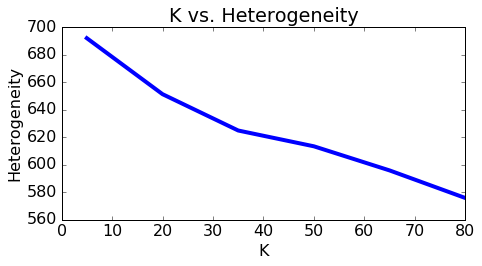

In [82]:
plot_k_vs_heterogeneity(k_lst, h_lst)

In [ ]:
start = time()
k_list = [5, 10, 20, 30, 40, 50, 60]
heterogeneity_lst = compute_heterogeneity(tf_mat, k_list)
end = time()
print(end-start)

In [ ]:
plot_k_vs_heterogeneity(k_list, heterogeneity_lst)

In [ ]:
from collections import defaultdict

In [ ]:
cluster_assignments = KMeans_models[10].labels_

In [ ]:
np.bincount(cluster_assignments)

In [ ]:
distance_mat = KMeans_models[10].transform(tf_mat)

In [ ]:
from sklearn.preprocessing import normalize
tf_mat_norm = normalize(tf_mat)

In [ ]:
[compute_heterogeneity(tf_mat_norm, 10, KMeans_models[k].cluster_centers_, KMeans_models[k].labels_) for k in k_list]

## LDA

Not all topics have a clear theme
Things to try:
try setting max_features in cv (this seemed to help)
use graphlab
modify alpha and beta in LDA
reduce the number of topics
*there was something about using k-means (elbow plot to initalize other algos)

In [ ]:
cv = CountVectorizer(stop_words='english', min_df=2, max_df=.95)

In [ ]:
cv2 = CountVectorizer(stop_words='english', min_df=2, max_df=.95, max_features=10000)

In [ ]:
cv3 = CountVectorizer(stop_words='english', min_df=2, max_df=.95, max_features=5000)

In [ ]:
tf = cv.fit_transform(df['text'])

In [ ]:
tf2 = cv2.fit_transform(df['text'])

In [ ]:
tf3 = cv3.fit_transform(df['text'])

In [ ]:
len(cv.get_feature_names())

In [ ]:
len(cv2.get_feature_names())

In [ ]:
lda_1 = LatentDirichletAllocation(n_topics=30, max_iter=100, n_jobs=4, doc_topic_prior=5.0, topic_word_prior=None, random_state=0)

In [ ]:
lda_2 = LatentDirichletAllocation(n_topics=30, max_iter=100, n_jobs=4, doc_topic_prior=5.0, topic_word_prior=None, random_state=0)

In [ ]:
lda_3 = LatentDirichletAllocation(n_topics=30, max_iter=100, n_jobs=4, doc_topic_prior=5.0, topic_word_prior=None, random_state=0)

In [ ]:
t0 = time()
lda_1.fit(tf)
print "done in {0}".format(time()-t0)

In [ ]:
t0 = time()
lda_2.fit(tf2)
print "done in {0}".format(time()-t0)

In [ ]:
t0 = time()
lda_3.fit(tf3)
print "done in {0}".format(time()-t0)

In [ ]:
lda_2.components_[0]

In [ ]:
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print "Topic #%d:" % topic_idx
        print " ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]])

In [ ]:
print_top_words(lda_1, cv.get_feature_names(), 20)

In [ ]:
print_top_words(lda_2, cv2.get_feature_names(), 20)

In [ ]:
print_top_words(lda_3, cv3.get_feature_names(), 20)

Try using graplab

In [ ]:
lda_2.transform(tf2)[0]

## Code Archive

In [ ]:
def compute_heterogeneity(data, k_list, num_runs=10, jobs=4):
    heterogeneity = []
    for k in k_list:
        d = defaultdict(list)
        model = KMeans(n_clusters=k, n_init=num_runs, n_jobs=jobs)
        distance_matrix = model.fit_transform(data)
        cluster_assignments = model.labels_
        for idx, c in enumerate(cluster_assignments):
            d[c].append(distance_matrix[idx, c])
        heterogeneity.append(sum([sum(d[key]) for key in d]))
    return heterogeneity

#plot_k_vs_heterogeneity(k_list, heterogeneity_values)

